#decision tree

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Ai Quest/class-8/assignment/Smoking data.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


#data visualization


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [34]:
import seaborn as sns

target holo smoker

In [36]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

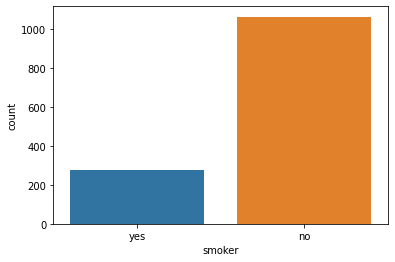

In [37]:
sns.countplot(x='smoker', data=df)

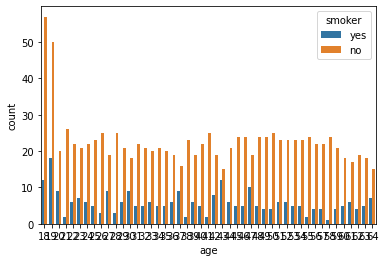

In [40]:
sns.countplot(x='age',data=df, hue='smoker')

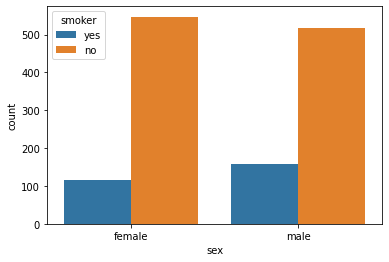

In [41]:
sns.countplot(x='sex',data=df, hue='smoker')

#x y partition

In [7]:
x = df.drop('smoker',axis=1)

In [8]:
y = df['smoker']

#encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
from pandas.core.dtypes.common import is_numeric_dtype

In [12]:
for column in x.columns:
    if is_numeric_dtype(x[column]):
        continue
    
    x[column] = le.fit_transform(x[column])

In [13]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


#spliting

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1) 

In [16]:
xtrain.head()

,region,age,sex,bmi,children
744,1,50,1,26.41,0
363,3,21,0,26.40,1
10,0,25,1,26.22,0
970,2,50,0,28.16,3
634,3,51,1,39.70,1


In [17]:
ytrain.head()

744    no
363    no
10     no
970    no
634    no
Name: smoker, dtype: object

In [18]:
from sklearn.tree import DecisionTreeClassifier
d_clf = DecisionTreeClassifier()


#training

In [19]:
d_clf.fit(xtrain,ytrain) #fit manei training

DecisionTreeClassifier()

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

In [21]:
#tree.plot_tree(d_clf)

In [22]:
#plt.figure(figsize=(10,10))
#tree.plot_tree(d_clf)

#training tree

In [23]:
x_features = xtrain.columns

[Text(0.3347630718954248, 0.9791666666666666, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(0.2040398624727669, 0.9375, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(0.05228758169934641, 0.8958333333333334, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(0.04793028322440087, 0.8541666666666666, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.030501089324618737, 0.8125, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(0.013071895424836602, 0.7708333333333334, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.008714596949891068, 0.7291666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.017429193899782137, 0.7291666666666666, 'bmi <= 18.953\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.008714596949891068, 0.6875, 'age <= 34.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.004357298474945534, 0.6458333333333334, 'gini = 0.0\nsa

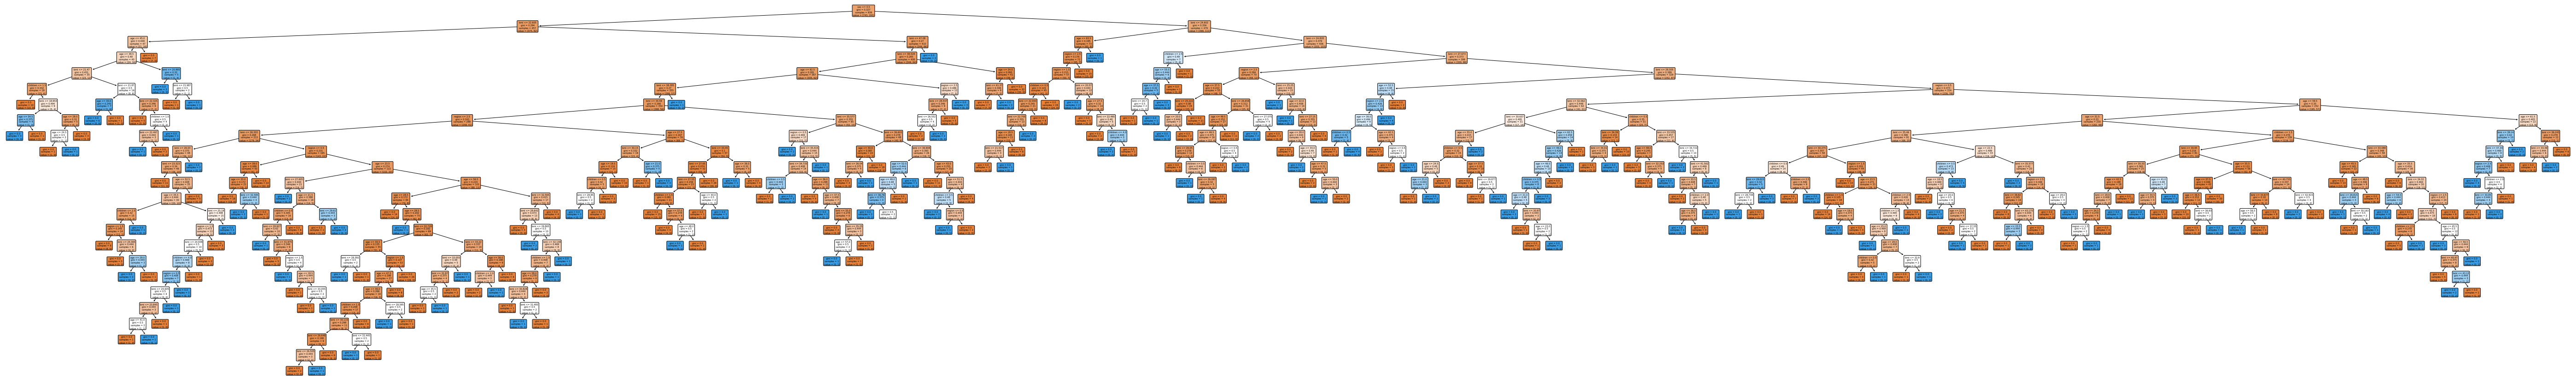

In [24]:
plt.figure(figsize=(100,15))
tree.plot_tree(d_clf,filled=True,rounded=True,feature_names=x_features)

#testing

In [25]:
testing = d_clf.predict(xtest) # ytest

In [26]:
ytest.head

<bound method NDFrame.head of 559      no
1087     no
1020     no
460      no
802      no
       ... 
323      no
1268     no
134      no
1274    yes
876      no
Name: smoker, Length: 402, dtype: object>

In [27]:
testing

array(['yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no',

#testing tree

[Text(0.3347630718954248, 0.9791666666666666, 'sex <= 0.5\ngini = 0.327\nsamples = 936\nvalue = [743, 193]'),
 Text(0.2040398624727669, 0.9375, 'bmi <= 22.605\ngini = 0.294\nsamples = 457\nvalue = [375, 82]'),
 Text(0.05228758169934641, 0.8958333333333334, 'age <= 45.0\ngini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(0.04793028322440087, 0.8541666666666666, 'age <= 38.5\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.030501089324618737, 0.8125, 'bmi <= 21.47\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(0.013071895424836602, 0.7708333333333334, 'children <= 1.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.008714596949891068, 0.7291666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.017429193899782137, 0.7291666666666666, 'bmi <= 18.953\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.008714596949891068, 0.6875, 'age <= 34.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.004357298474945534, 0.6458333333333334, 'gini = 0.0\nsa

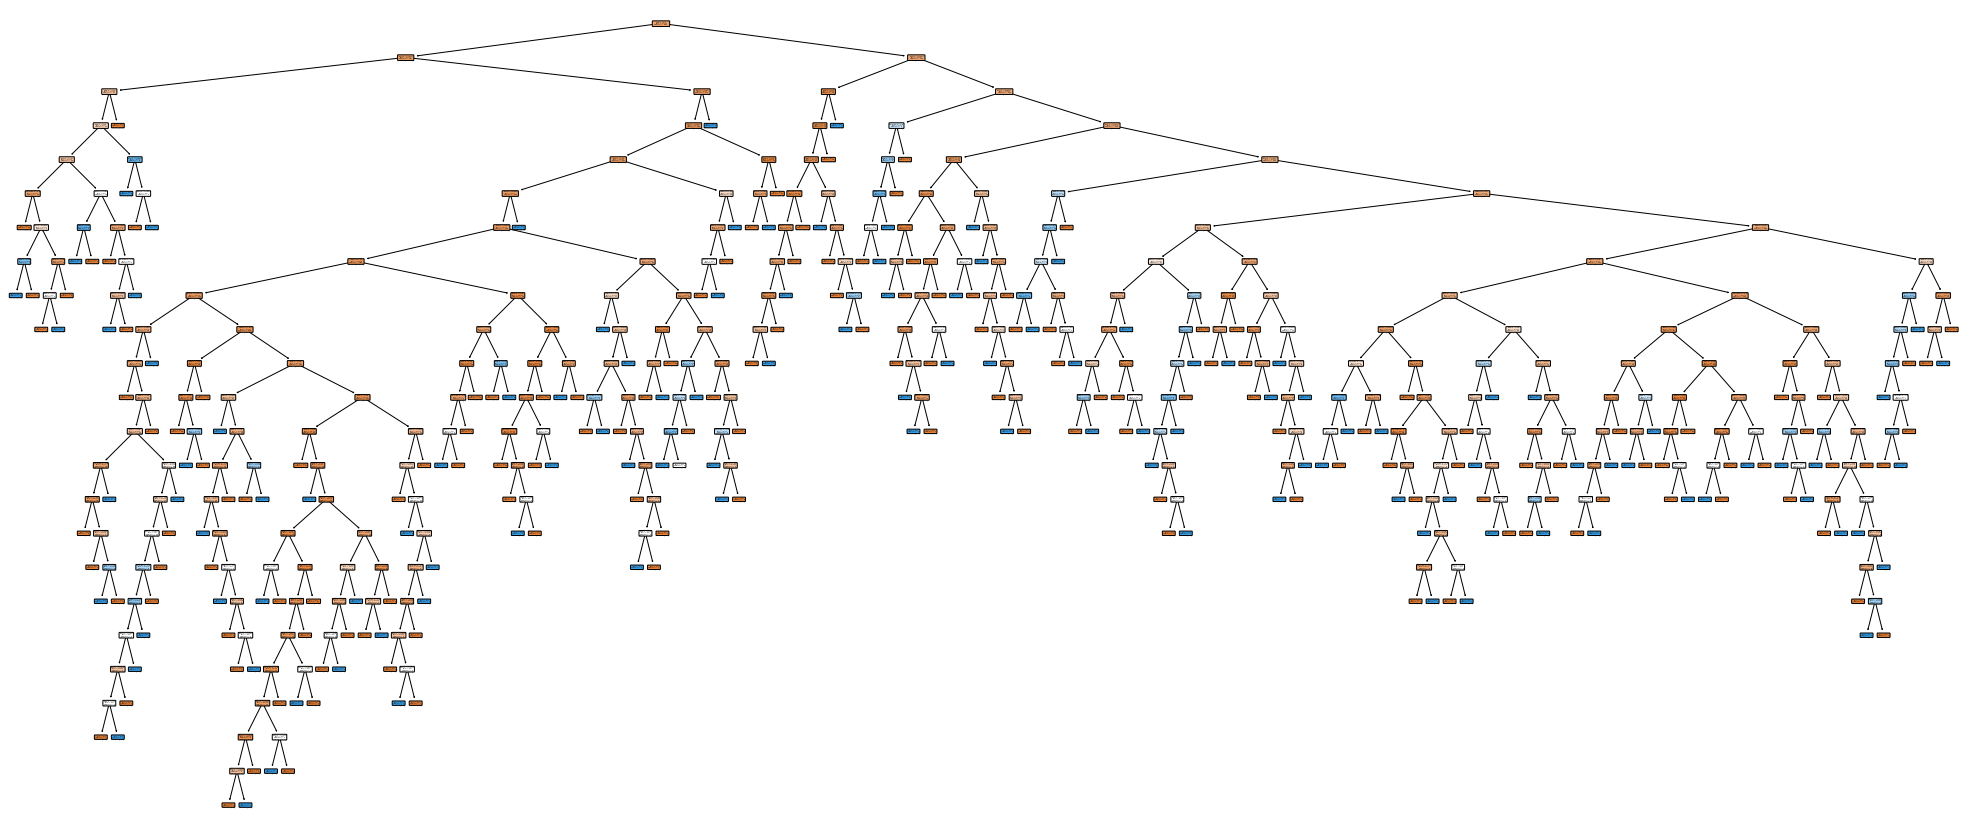

In [28]:
xtst_features = xtest.columns
plt.figure(figsize=(35,15))
tree.plot_tree(d_clf,filled=True,rounded=True,feature_names=xtst_features)

southwest,	19,	female,	27.900,	0  ------------- 	yes


southeast,	18,	male,	33.770,	1	 ------------ no

uporer ta nominal

nicher ta corresponding numeric with label encoder


3	19	0	27.900	0	------------ yes


2	18	1	33.770	1	----------- no

In [44]:
ytrain.value_counts()

no     743
yes    193
Name: smoker, dtype: int64

In [45]:
ytest.value_counts()

no     321
yes     81
Name: smoker, dtype: int64

#predict

In [29]:
d_clf.predict([[3, 19, 0, 27.900, 0]])  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['yes'], dtype=object)

In [30]:
d_clf.predict([[2, 18, 1, 33.770, 1 ]])  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['no'], dtype=object)

In [46]:
pred = d_clf.predict(xtest) # predicted result

In [47]:
pred

array(['yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no',

In [50]:
import numpy as np
np.array(ytest) #actual result

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',

#prediction measurements 

In [51]:
d_clf.score(xtest, ytest)

0.6741293532338308

In [52]:
d_clf.score(xtrain, ytrain)

0.9989316239316239

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [55]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

          no       0.80      0.79      0.79       321
         yes       0.22      0.23      0.22        81

    accuracy                           0.67       402
   macro avg       0.51      0.51      0.51       402
weighted avg       0.68      0.67      0.68       402



In [56]:
con_mat = confusion_matrix(ytest, pred)

In [57]:
con_mat

array([[252,  69],
       [ 62,  19]])

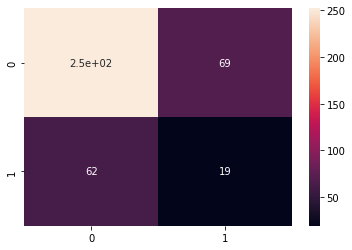

In [58]:
sns.heatmap(con_mat, annot=True)

In [59]:
TP, FN, FP, TN = confusion_matrix(ytest, pred).reshape(-1)

In [60]:
TP

252

In [61]:
FP

62

In [62]:
TN

19

In [63]:
FN

69

#accuracy

In [64]:
accuracy = (TP+TN)/ (TP+FP+TN+FN)

In [65]:
accuracy

0.6741293532338308

#ROC_CURVE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


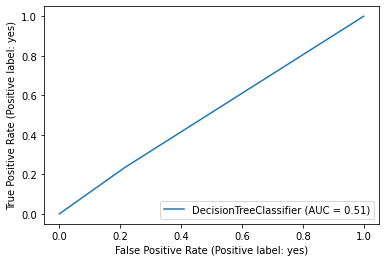

In [66]:
plot_roc_curve(d_clf, xtest, ytest)

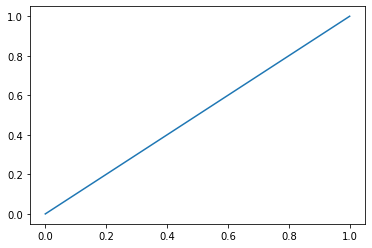

In [67]:
plt.plot([0,1],[0,1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


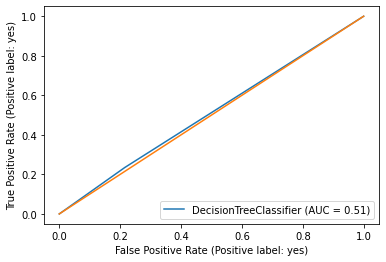

In [68]:
plot_roc_curve(d_clf,xtest,ytest)
plt.plot([0,1],[0,1])

AUC = 0.51 that means not acceptable  

#Precision or positive predictive value (PPV)

In [77]:
Precision = TP/(TP+FP)

In [78]:
Precision

0.802547770700637

#Sensitivity or Recall or HIt Rate or True Positive Rate (TPR)

In [79]:
Recall = TP/(TP+FN)

In [80]:
Recall

0.7850467289719626

#False Positive Rate

In [81]:
FPR = FP/(FP+TN)

In [82]:
FPR

0.7654320987654321

#F1 Measure

In [83]:
F1_Measure =  (Precision+Recall)/2

In [84]:
F1_Measure

0.7937972498362997

#Harmonic Mean or F1 score

In [85]:
F1_score = (2*Precision*Recall)/(Precision+Recall)

In [86]:
F1_score

0.7937007874015748

#Specificity

In [87]:
Specificity = TN/(TN+FP)

In [88]:
Specificity

0.2345679012345679

#Critical Success Index (CSI)

In [89]:
CSI = TP/(TP+FN+FP)

In [90]:
CSI

0.6579634464751958

#False Discovery Rate(FDR)

In [91]:
FDR = FP/(TP+FP)

In [92]:
FDR

0.19745222929936307